In [1]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set_style('darkgrid')

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

C:\Users\jgaur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


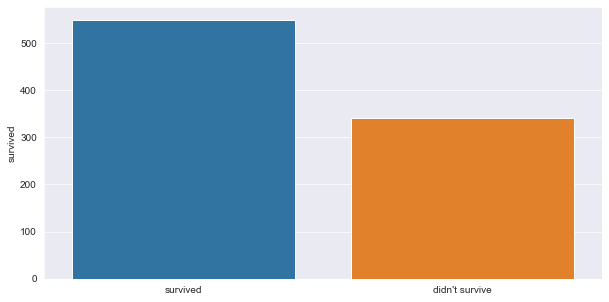

In [6]:
plt.figure(figsize=(10, 5));
survived = df.survived.value_counts()
survived.index = ['survived', "didn't survive"]
sns.barplot(survived.index, survived);

<AxesSubplot:>

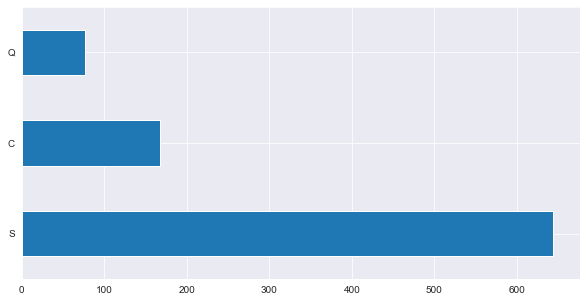

In [7]:
plt.figure(figsize=(10, 5))
df.embarked.value_counts().plot.barh()

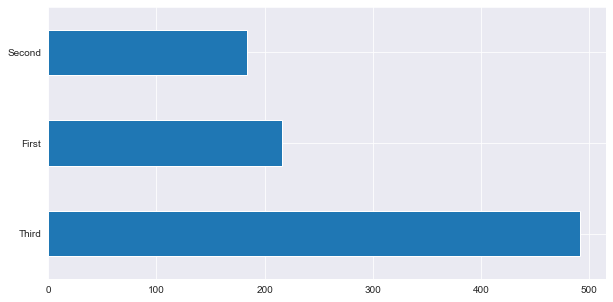

In [8]:
plt.figure(figsize=(10, 5))
df['class'].value_counts().plot.barh();

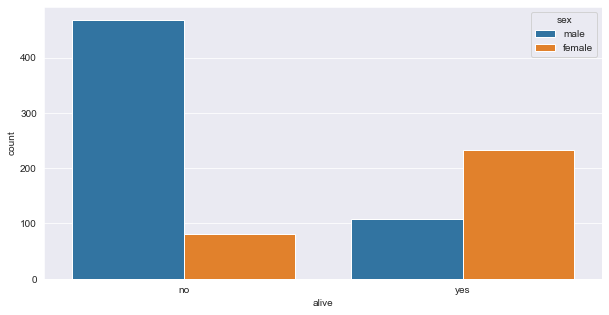

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(x='alive', data=df, hue='sex');

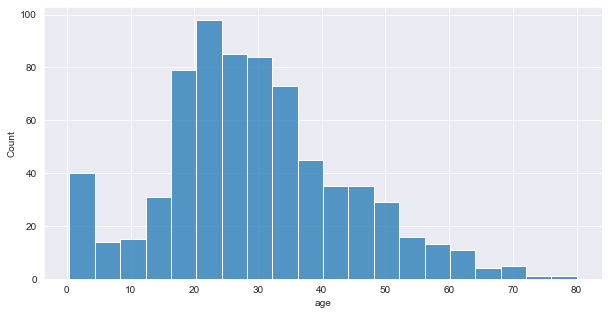

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(x='age', data=df, bins=20);

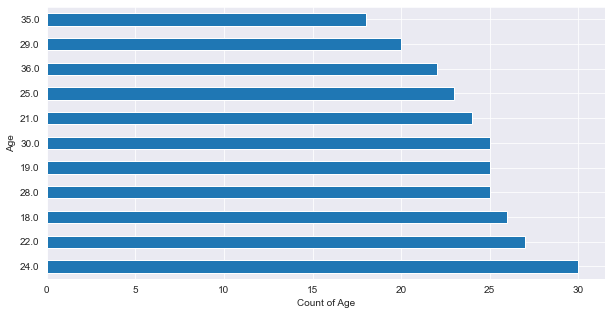

In [11]:
plt.figure(figsize=(10, 5))
df.age.value_counts().nlargest(11).plot.barh();
plt.xlabel('Count of Age')
plt.ylabel('Age');

In [12]:
df.corr().iloc[0, 1]

-0.33848103596101514

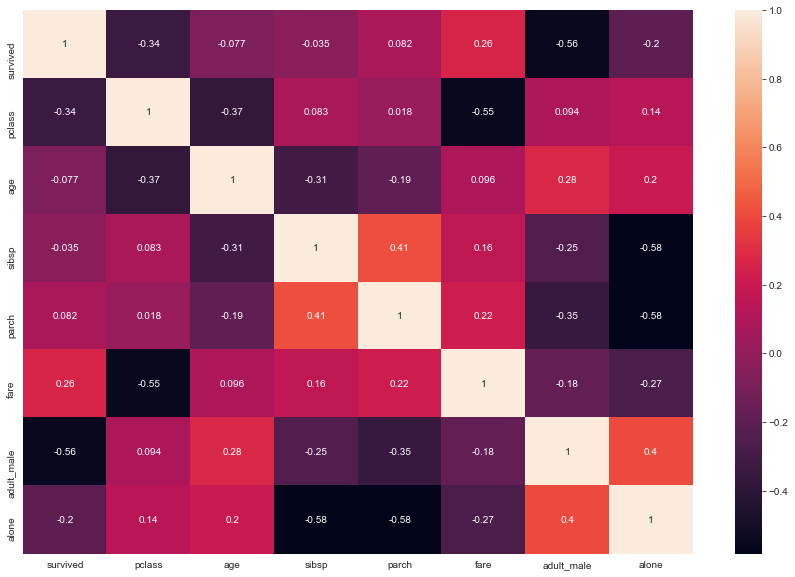

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True);

In [14]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


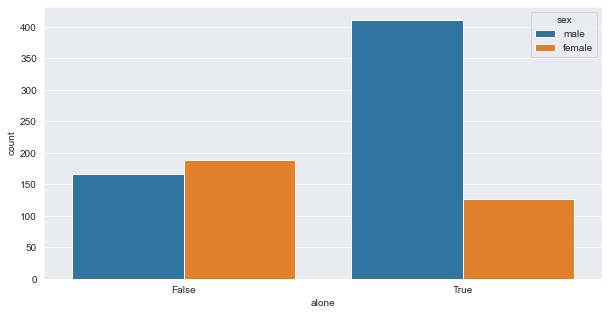

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x='alone', data=df, hue='sex');

In [16]:
df['embarked'].fillna(value=df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(value=df['embark_town'].mode()[0], inplace=True)

In [17]:
def get_label_class(val):
    if val == 'First':
        val = 0
    elif val == 'Second':
        val = 1
    elif val == 'Third':
        val = 2
    return val

def get_label_embarked(val):
    if val == 'S':
        val = 0
    elif val == 'C':
        val = 1
    elif val == 'Q':
        val = 2
    return val

def get_label_embarktown(val):
    if val == 'Southampton':
        val = 0
    elif val == 'Cherbourg':
        val = 1
    elif val == 'Queenstown':
        val = 2
    return val

In [18]:
df['sex'] = np.where(df['sex'] == 'male', 1, 0)

df['class'] = df['class'].map(get_label_class) 

df.drop(['who'], axis=1, inplace=True)

df['embarked'] = df['embarked'].map(get_label_embarked)

df['adult_male'] = np.where(df['adult_male'] == True, 1, 0)

df['embark_town'] = df['embark_town'].map(get_label_embarktown)

df.drop(['deck'], axis=1, inplace=True)

df.drop(['alive'], axis=1, inplace=True)

df['alone'] = np.where(df['alone'] == True, 1, 0)

In [19]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,0,2,1,0,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,0,2,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,0,2,1,0,1


In [20]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alone
886,0,2,1,27.0,0,0,13.00,0,1,1,0,1
887,1,1,0,19.0,0,0,30.00,0,0,0,0,1
888,0,3,0,NaN,1,2,23.45,0,2,0,0,0
889,1,1,1,26.0,0,0,30.00,1,0,1,1,1
890,0,3,1,32.0,0,0,7.75,2,2,1,2,1


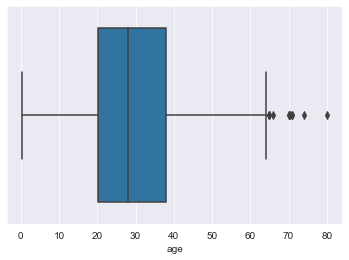

In [21]:
sns.boxplot(x='age', data=df);

In [22]:
upper_value = df['age'].mean() + (3 * df.age.std())
lower_value = df['age'].mean() - (3 * df.age.std())

print(upper_value)
print(lower_value)

73.27860964406095
-13.88037434994331


In [23]:
df.loc[df.age > upper_value, 'age'] = upper_value

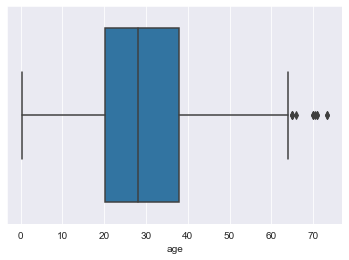

In [24]:
sns.boxplot(x='age', data=df);

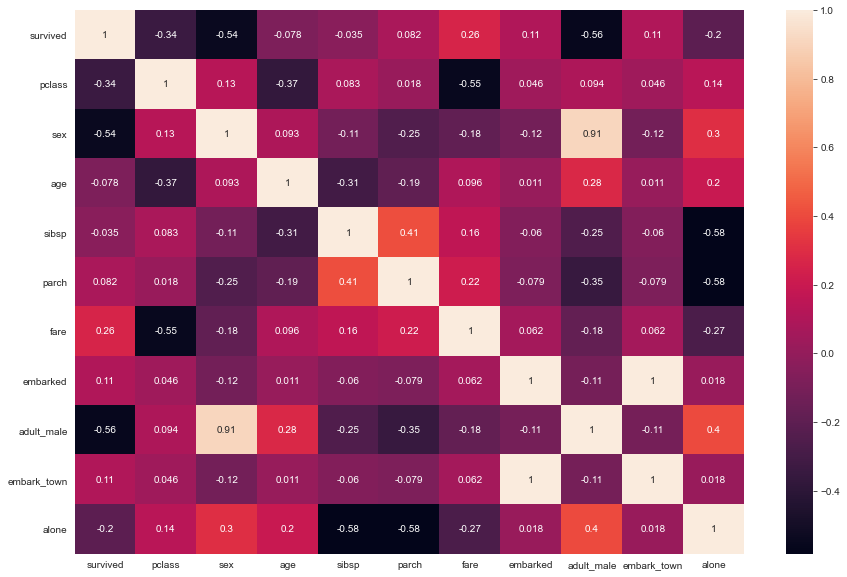

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True);

In [26]:
df.drop(['adult_male', 'embarked'], axis=1, inplace=True)

In [27]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0
4,0,3,1,35.0,0,0,8.0500,2,0,1


C:\Users\jgaur\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


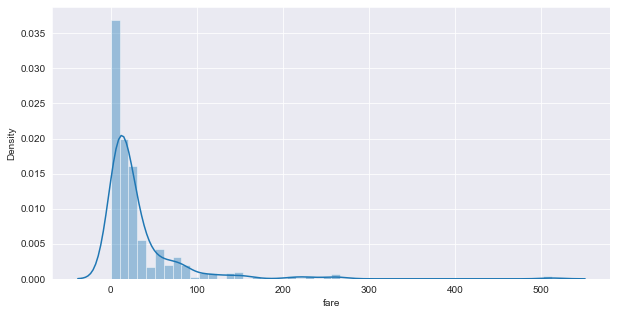

In [28]:
plt.figure(figsize=(10, 5))
sns.distplot(df.fare);

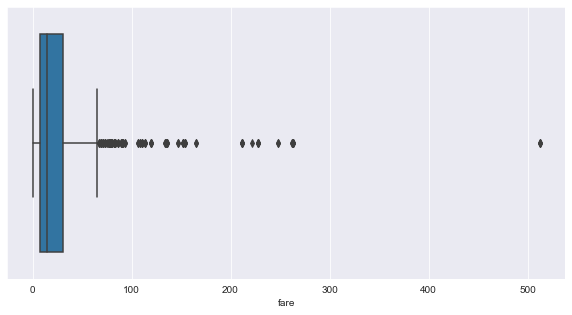

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='fare', data=df);

In [30]:
IQR = df.fare.quantile(0.75) - df.fare.quantile(0.25)

lower_value = df.fare.quantile(0.25) - (IQR * 1.5)
upper_value =  df.fare.quantile(0.75) + (IQR * 1.5)

# lower_value_extreme = df.fare.quantile
print(lower_value)
print(upper_value)

-26.724
65.6344


In [31]:
df.loc[df.fare > upper_value, 'fare'] = upper_value

C:\Users\jgaur\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


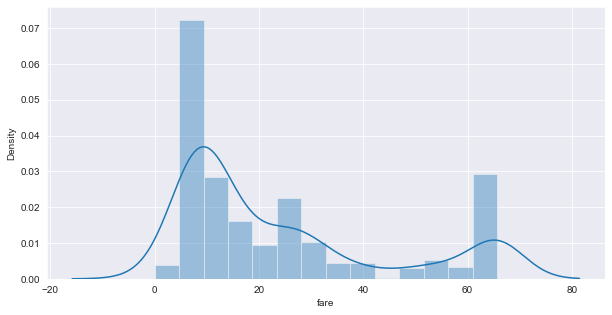

In [32]:
plt.figure(figsize=(10, 5))
sns.distplot(df.fare);

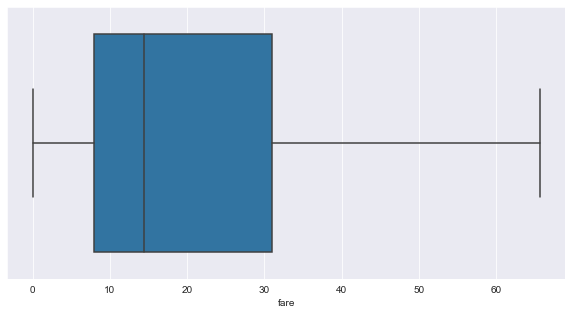

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='fare', data=df);

In [34]:
df.age = df.age.fillna(value=df.age.mean())

In [35]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
embark_town    0
alone          0
dtype: int64

In [36]:
X = df.loc[:, 'pclass':]
y = df.loc[:, 'survived']

In [37]:
X.head()

,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone
0,3,1,22.0,1,0,7.2500,2,0,0
1,1,0,38.0,1,0,65.6344,0,1,0
2,3,0,26.0,0,0,7.9250,2,0,1
3,1,0,35.0,1,0,53.1000,0,0,0
4,3,1,35.0,0,0,8.0500,2,0,1


In [38]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [39]:
X = X.values
y = y.values

In [40]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape

(712, 9)

In [43]:
X_test.shape

(179, 9)

In [44]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_dim=9))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

In [46]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
callback = tf.keras.callbacks.EarlyStopping(
    patience=5,
    monitor='val_loss',
)

In [48]:
history = model.fit(X_train, y_train, batch_size=32, callbacks=[callback], validation_split=0.2, epochs=100, verbose=1)

Epoch 1/100
18/18 [==============================] - 6s 237ms/step - loss: 0.6574 - accuracy: 0.5996 - val_loss: 0.5578 - val_accuracy: 0.7483
Epoch 2/100
18/18 [==============================] - 0s 10ms/step - loss: 0.5659 - accuracy: 0.6994 - val_loss: 0.4854 - val_accuracy: 0.8112
Epoch 3/100
18/18 [==============================] - 0s 9ms/step - loss: 0.5103 - accuracy: 0.7687 - val_loss: 0.4551 - val_accuracy: 0.7972
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 0.4935 - accuracy: 0.7769 - val_loss: 0.4284 - val_accuracy: 0.8252
Epoch 5/100
18/18 [==============================] - 0s 9ms/step - loss: 0.4963 - accuracy: 0.7905 - val_loss: 0.4245 - val_accuracy: 0.7762
Epoch 6/100
18/18 [==============================] - 0s 9ms/step - loss: 0.4922 - accuracy: 0.7592 - val_loss: 0.4207 - val_accuracy: 0.7972
Epoch 7/100
18/18 [==============================] - 0s 10ms/step - loss: 0.4574 - accuracy: 0.8139 - val_loss: 0.4070 - val_accuracy: 0.8112
Epoch 8/

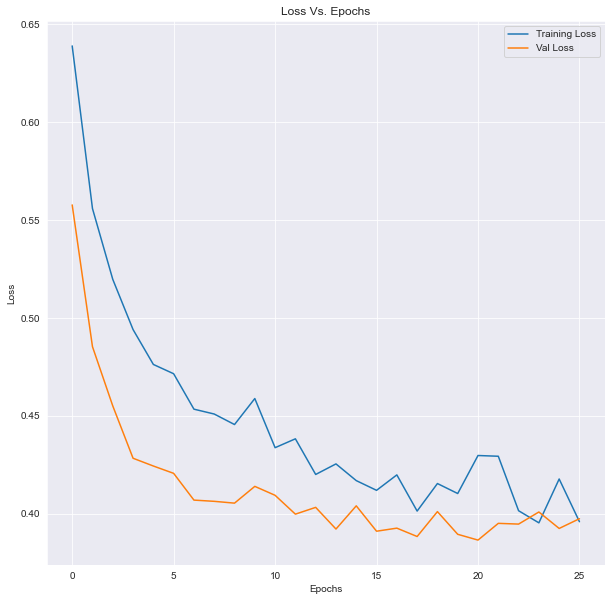

In [49]:
plt.figure(figsize=(10, 10));
plt.plot(history.history['loss'], label='train_loss');
plt.plot(history.history['val_loss'], label='val_loss');
plt.title('Loss Vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Val Loss']);

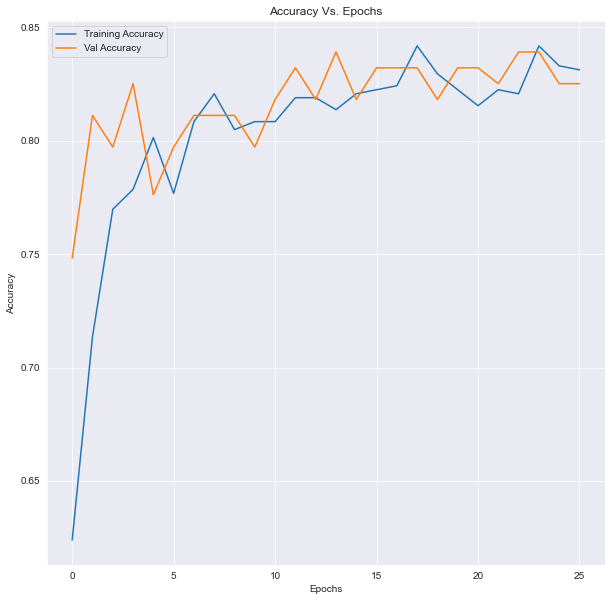

In [50]:
plt.figure(figsize=(10, 10));
plt.plot(history.history['accuracy'], label='train_acc');
plt.plot(history.history['val_accuracy'], label='val_acc');
plt.title('Accuracy Vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Val Accuracy']);

In [51]:
pred = model.predict(X_test)

In [52]:
predic = []
for i in pred:
    if i > 0.5:
        predic.append(1)
    else:
        predic.append(0)

In [53]:
predic = np.array(predic)

----------------------------------------------------Accuracy------------------------------------------------------
0.8268156424581006

---------------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.70      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179


-------------------------------------------------Confustion Metrics----------------------------------------------------


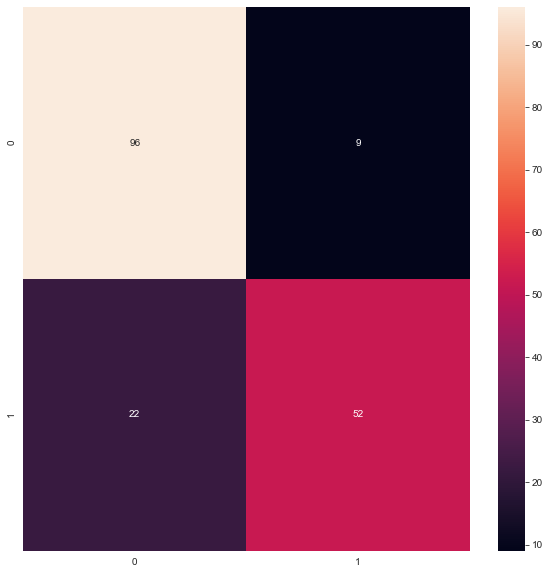

In [54]:
print("----------------------------------------------------Accuracy------------------------------------------------------")
print(accuracy_score(y_test, predic))
print()

print("---------------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, predic))
print()

print("-------------------------------------------------Confustion Metrics----------------------------------------------------")
plt.figure(figsize=(10, 10));
sns.heatmap(confusion_matrix(y_test, predic), annot=True);

In [55]:
x = pd.DataFrame({'Actual': y_test, 'Predicted': predic}, columns=['Actual', 'Predicted'])

In [56]:
x.head(50)

,Actual,Predicted
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,1,1
7,0,0
8,1,1
9,1,1


In [58]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
